In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore") 

df1 = pd.read_csv('scores/handle_time_score.csv', index_col=0)
df2 = pd.read_csv('scores/volume_score.csv', index_col=0)
df3 = pd.read_csv('scores/aht_score.csv', index_col=0)

df = pd.concat([df1,df2,df3],0)
df['bu'] = df.index
df.index = range(df.shape[0])

df['diff'] = df['old'] - df['prophet']

diff = df[df['diff']>0]
diff

,old,prophet,kpi,start_train,end_train,bu,diff
0,17326.333333,13187.170243,handle_time,2018-10-01,2020-10-01,BRO-Co,4139.163090
1,155039.622951,132135.213482,handle_time,2017-01-20,2020-06-01,RIS_ah,22904.409469
2,23283.428571,22159.426852,handle_time,2018-11-01,2020-11-01,BRO_ah,1124.001720
3,22951.642857,15619.191911,handle_time,2018-11-01,2020-11-01,CS-Mar,7332.450946
4,100356.166667,65889.087301,handle_time,2018-10-01,2020-10-01,PSG_ah,34467.079365
6,11322.122807,7020.772130,handle_time,2017-01-01,2020-09-01,CS-Nat,4301.350677
7,5689.785714,3825.260409,handle_time,2018-11-01,2020-11-01,CS-Ala,1864.525305
8,352606.070175,213364.695370,handle_time,2016-01-20,2020-09-01,WISE-C,139241.374805
10,25.000000,21.704785,volume,2018-10-01,2020-10-01,BRO-Co,3.295215
11,45.785714,41.477053,volume,2018-11-01,2020-11-01,BRO_ah,4.308661


In [108]:
for kpi in ['handle_time', 'volume', 'aht']:
    
    hours_saved = diff.loc[df['kpi']==kpi]['diff'].sum()
    if kpi == 'handle_time':
        hours_saved /= 3600

    print('\nDaily '+kpi+' Saved:',round(hours_saved,1))
    print('Annual Savings:',"${:,.2f}".format(hours_saved * 262 * 25))


Daily handle_time Saved: 59.8
Annual Savings: $391,861.67

Daily volume Saved: 91.7
Annual Savings: $600,342.44

Daily aht Saved: 84.7
Annual Savings: $554,942.24


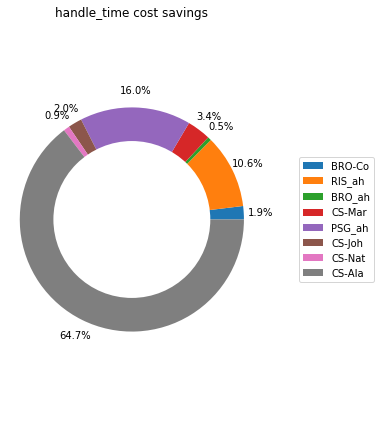

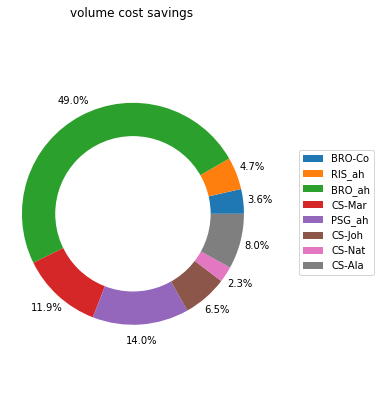

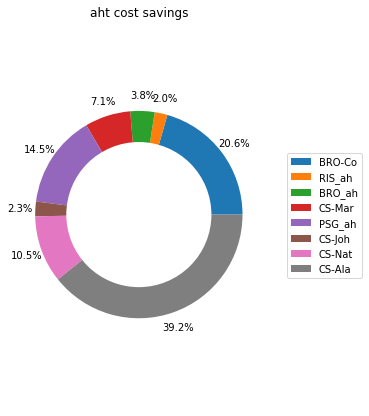

In [109]:
for i, kpi in enumerate(['handle_time', 'volume', 'aht']):
    diff[diff['kpi']==kpi].plot.pie(autopct='%0.1f%%', figsize=(6, 6), 
                 y='diff', labels=None, pctdistance=1.15)
    plt.title(kpi+' cost savings')
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.ylabel('')
    plt.legend(labels=df['bu'], loc='right', bbox_to_anchor=(1.5,0.5))
    plt.axis('equal')
    plt.tight_layout()
    plt.show()